<a href="https://colab.research.google.com/github/neflem27/Algorithmic_Insights-My_Machine_Learning_Library/blob/main/Predicting_Sales_with_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Sales with Simple Linear Regression

**Definition**: SImple linear regression is a statistical method used to model the relationship between a dependent variable ($Y$)  and one independent variable ($X$) by fitting a linear equation to the observed data. Both variables need to be numerical.

## Libraries

In [ ]:
import numpy as np # Data manipulation
import pandas as pd # Data manipulation
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Plots
import mpl_toolkits # Plots
from sklearn import linear_model # Machine learning algorithms
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings ("ignore")

## Import Data

In [ ]:
df = pd.read_csv('Linear Regression Data.csv')

In [ ]:
df.shape # Dimensions(Rows by Columns)

(17, 2)

In [ ]:
df

,Marketing Budget (X) in Thousands,Actual Sales(Y) in Millions
0,127.4,10.5
1,364.4,21.4
2,150.0,10.0
3,128.7,9.6
4,285.9,17.4
5,200.0,12.5
6,303.3,20.0
7,315.7,21.0
8,169.8,14.7
9,104.9,10.1


## Scatter Plot

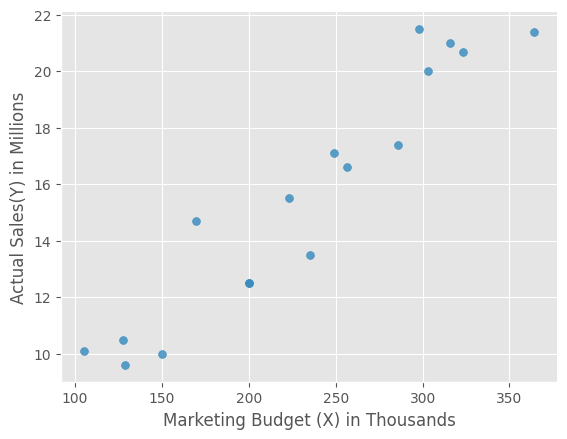

In [ ]:

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Marketing Budget (X) in Thousands', y='Actual Sales(Y) in Millions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Correlation Heatmap

<Axes: >

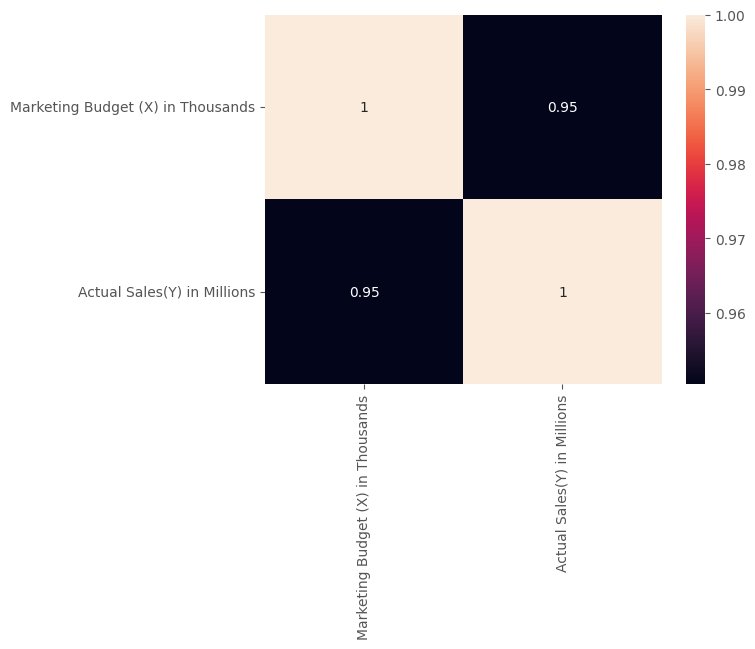

In [ ]:
sns.heatmap(df.corr(), annot = True)

## Linear Regression Model


$$ Y_i = B_0 + B_1X_i + \epsilon$$

Where:
* $Y$ = Dependent Variable (Sales)
* $B_0$ = Y-intercept
* $B_1$ = Slope of coefficent
* $X$ = Independent variable (Marketing Budget)
* $\epsilon$ = Random error

### Fitting the model

In [ ]:
Marketing_Budget_k= df.drop('Actual Sales(Y) in Millions',axis='columns')
Actual_sales_m = df['Actual Sales(Y) in Millions']
lr = linear_model.LinearRegression()
lr.fit(Marketing_Budget_k,Actual_sales_m)
# summary of the model
print('model intercept :', lr.intercept_)
print('model coefficients : ', lr.coef_)
print('Model score : ', lr.score(Marketing_Budget_k, Actual_sales_m))

model intercept : 3.3524968264935975
model coefficients :  [0.05276727]
Model score :  0.9032974628797796


## Predictions

In [ ]:
# Predict sales given a budget of 150k (Recall that sales unit is in million)
lr.predict([[150]])

array([11.26758759])

### Line of best fit

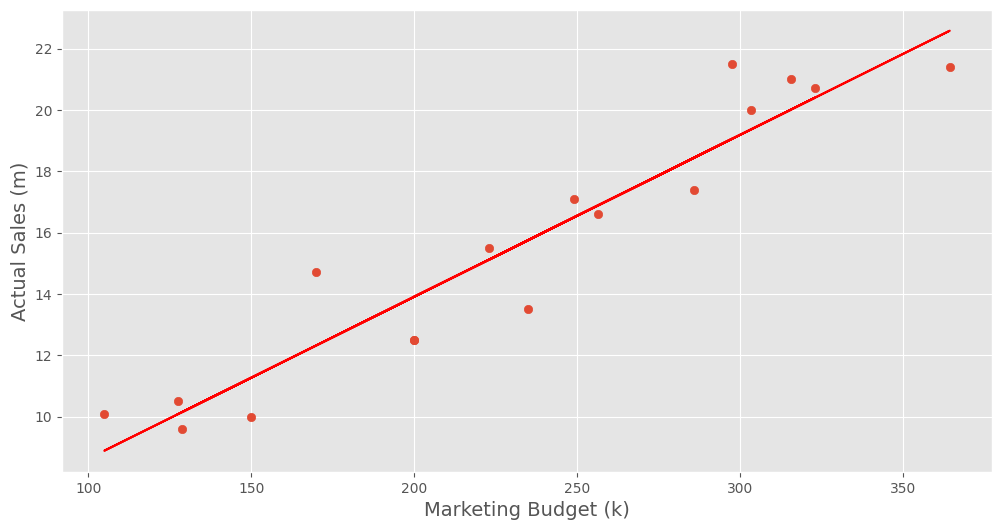

In [ ]:
y_predict = lr.predict(Marketing_Budget_k)
plt.figure(figsize=(12,6))
plt.scatter(df['Marketing Budget (X) in Thousands'], df['Actual Sales(Y) in Millions'])
plt.plot(df['Marketing Budget (X) in Thousands'], y_predict, 'r')
plt.xlabel('Marketing Budget (k)', fontsize=14)
plt.ylabel('Actual Sales (m)', fontsize=14)
plt.show()

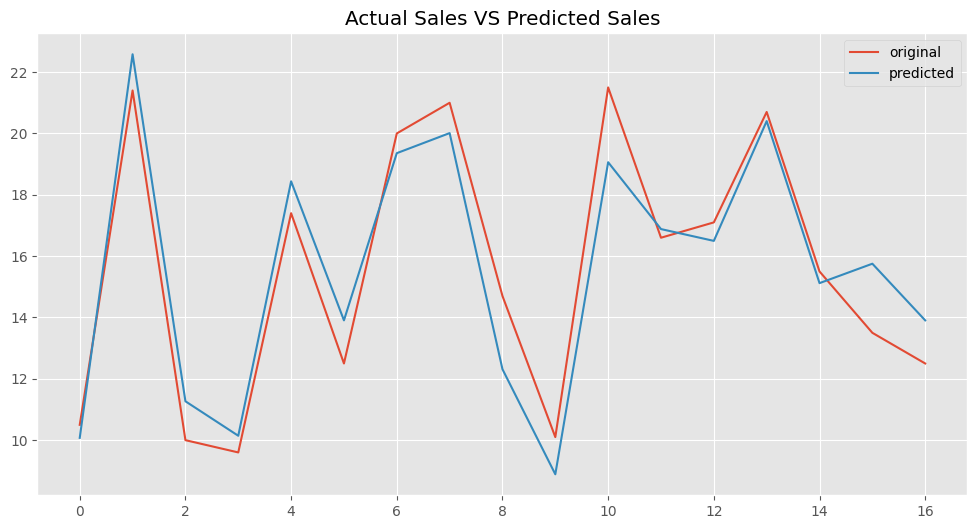

In [ ]:
plt.figure(figsize=(12,6))
x_ax = range(len(df['Actual Sales(Y) in Millions']))
plt.plot(x_ax, df['Actual Sales(Y) in Millions'], label="original")
plt.plot(x_ax,y_predict, label="predicted")
plt.title("Actual Sales VS Predicted Sales")
plt.legend()
plt.show()

# Proposed Budget VS Forcasted Sales



In [ ]:
from pandas import DataFrame
# Proposed budget
Stock_Market = {"Marketing Budget (X) in Thousands": [201,207,225,225,270,275,292,299,310,323,] }
b_df = DataFrame(Stock_Market,columns=["Marketing Budget (X) in Thousands"])
#Predict Sales for the forecasted budget amount
ps = lr.predict(b_df)

In [ ]:
b_df['Forecasted Sales (m)'] = ps
b_df.rename(columns={'Marketing Budget (X) in Thousands': "Marketing Budget (k)"})

,Marketing Budget (k),Forecasted Sales (m)
0,201,13.958718
1,207,14.275322
2,225,15.225133
3,225,15.225133
4,270,17.599660
5,275,17.863497
6,292,18.760540
7,299,19.129911
8,310,19.710351
9,323,20.396326


## Pros and Cons of Linear Regression
**Pros:**

1. **Simple to Understand:** It's straightforward and easy to understand, making it accessible to a wide range of users.
  
2. **Interpretability:** The coefficients in simple linear regression have clear interpretations. For instance, the slope represents the change in the dependent variable for a one-unit change in the independent variable.
  
3. **Computational Efficiency:** It's computationally less intensive compared to more complex models, making it faster to train and deploy.
  
4. **Useful for Trend Analysis:** Simple linear regression is useful for identifying and quantifying trends in data, especially when you suspect a linear relationship between variables.

**Cons:**

1. **Limited Flexibility:** It assumes a linear relationship between the independent and dependent variables, which might not be the case in real-world scenarios.
  
2. **Sensitive to Outliers:** Simple linear regression can be sensitive to outliers, which can significantly impact the model's performance and the estimated coefficients.
  
3. **Assumption of Homoscedasticity:** It assumes constant variance in the residuals across all levels of the independent variable. Violation of this assumption can lead to unreliable results.
  
4. **Inadequate for Complex Relationships:** It's not suitable for capturing complex relationships between variables, such as nonlinear or interactive effects.
  
5. **Overfitting:** While simple linear regression is less prone to overfitting compared to more complex models, it can still overfit if the model is too flexible relative to the amount of data available.